<a href="https://colab.research.google.com/github/Hamzakhan2005/ML-Practice/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression:

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

Importing the Dependencies

In [ ]:
import numpy as np

In [ ]:
class Linear_Regression():

  def __init__(self,learning_rate,no_of_iterations):

    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations

  def fit(self,X,Y):

    self.m,self.n=X.shape
    self.w=np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):

    Y_prediction=self.predict(self.X)
    dw=-(2*(self.X.T).dot(self.Y-Y_prediction))/self.m
    db=-2*np.sum(self.Y-Y_prediction)/self.m

    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db

  def predict(self,X):

    return X.dot(self.w)+self.b



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
salary_data=pd.read_csv('/content/salary_data.csv')

In [ ]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
salary_data.shape

(30, 2)

In [ ]:
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [ ]:
X=salary_data.iloc[:,:-1].values #removing last column
Y=salary_data.iloc[:,1].values #getting last column

In [ ]:
X_train ,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=2)

In [ ]:
model= Linear_Regression(learning_rate=0.02,no_of_iterations=1000)

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
print("WEIGHT =",model.w[0])
print("BIAS =",model.b)

WEIGHT = 9514.400999035135
BIAS = 23697.406507136307


In [ ]:
  test_data_prediction=model.predict(X_test)

In [ ]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


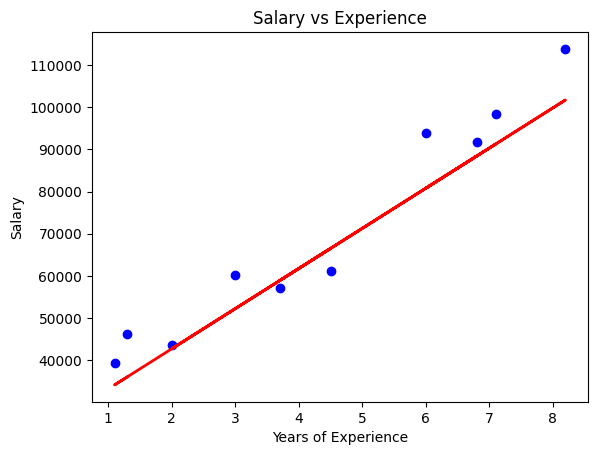

In [ ]:
plt.scatter(X_test,Y_test,color='blue')
plt.plot(X_test,test_data_prediction,color='red',linewidth=2)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.show()